In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Basic autoencoder

In [ ]:
"""
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape,Cropping2D,Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

input_file = Input(shape=(288,432, 3)) 

x = Conv2D(100, (3, 3), activation='elu', padding='same')(input_file) 
x = MaxPooling2D((2, 2), padding='valid')(x) 
x = Conv2D(80, (3, 3), activation='elu', padding='same')(x) 
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(40, (3, 3), activation='elu', padding='same')(x) 
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(20, (3, 3), activation='elu', padding='same')(x) 
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(10, (3, 3), activation='elu', padding='same')(x) 
#x = MaxPooling2D((2, 2), padding='same')(x)


x = Flatten()(x)
x = Dense(2430, activation='elu')(x)
x = Dense(1215, activation='elu')(x)

x = Dense(608, activation='elu')(x)
x = Dense(304, activation='elu')(x)
encoded = Dense(152, activation='elu')(x)

#.flat 13x72x40 features
# dense layer 10000-5000-2000-----128(200,300,500)
# reshape 13x72x40 (unfold) 

x = Dense(304, activation='elu')(encoded)
x = Dense(608, activation='elu')(x)
x = Dense(1215, activation='elu')(x)
x = Dense(2430, activation='elu')(x)
x = Dense(4860, activation='elu')(x)

x = Reshape((18,27 , 10))(x)
x = Conv2DTranspose(20, (2, 2),strides = (2,2), activation='elu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(20, (3, 3), activation='elu', padding='same')(x)

x = Conv2DTranspose(40, (2, 2),strides = (2,2), activation='elu', padding='same')(x)
x = Conv2D(40, (3, 3), activation='elu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
#x = Cropping2D(cropping=((0, 0), (1, 1)), data_format=None)(x)
x = Conv2DTranspose(80, (2, 2),strides = (2,2), activation='elu', padding='same')(x)
x = Conv2D(80, (3, 3), activation='elu', padding='same')(x)

x = Conv2DTranspose(100, (2, 2),strides = (2,2), activation='elu', padding='same')(x)
x = Conv2D(100, (3, 3), activation='elu', padding='same')(x)

#x = Conv2DTranspose(100, (2, 2),strides = (2,2), activation='elu', padding='same')(x)
#x = Conv2D(100, (3, 3), activation='elu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (1, 1), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_file, decoded)
autoencoder.compile(optimizer='adam', loss='mse') #msse
autoencoder.summary()
# 100 epoch
#encoder = model()
#model.saveweights
"""

"\nfrom tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape,Cropping2D,Conv2DTranspose\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras import backend as K\n\ninput_file = Input(shape=(288,432, 3)) \n\nx = Conv2D(100, (3, 3), activation='elu', padding='same')(input_file) \nx = MaxPooling2D((2, 2), padding='valid')(x) \nx = Conv2D(80, (3, 3), activation='elu', padding='same')(x) \nx = MaxPooling2D((2, 2), padding='same')(x)\nx = Conv2D(40, (3, 3), activation='elu', padding='same')(x) \nx = MaxPooling2D((2, 2), padding='same')(x)\nx = Conv2D(20, (3, 3), activation='elu', padding='same')(x) \nx = MaxPooling2D((2, 2), padding='same')(x)\nx = Conv2D(10, (3, 3), activation='elu', padding='same')(x) \n#x = MaxPooling2D((2, 2), padding='same')(x)\n\n\nx = Flatten()(x)\nx = Dense(2430, activation='elu')(x)\nx = Dense(1215, activation='elu')(x)\n\nx = Dense(608, activation='elu')(x)\nx = Dense(304, activation='elu')(x)\nencoded = Dense

# Architecture by Vinayak Sir 

In [ ]:
"""
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.initializers import orthogonal
import tensorflow as tf


def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,
                      kernel_initializer=kernel_init, name=prefix+'conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,
                               kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x



def AutoEncdoer(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # 256 x 256
    conv1 = Conv2DLayer(inputs, 64, 3, strides=1, padding='same', block_id=1)
    conv2 = Conv2DLayer(conv1, 64, 3, strides=2, padding='same', block_id=2)
    
    # 128 x 128
    conv3 = Conv2DLayer(conv2, 128, 5, strides=2, padding='same', block_id=3)
    
    # 64 x 64
    conv4 = Conv2DLayer(conv3, 128, 3, strides=1, padding='same', block_id=4)
    conv5 = Conv2DLayer(conv4, 256, 5, strides=2, padding='same', block_id=5)
    
    # 32 x 32
    conv6 = Conv2DLayer(conv5, 512, 3, strides=2, padding='same', block_id=6)
    
    # 16 x 16
    deconv1 = Transpose_Conv2D(conv6, 512, 3, strides=2, padding='same', block_id=7)
    
    # 32 x 32
    skip1 = layers.concatenate([deconv1, conv5], name='skip1')
    conv7 = Conv2DLayer(skip1, 256, 3, strides=1, padding='same', block_id=8)
    deconv2 = Transpose_Conv2D(conv7, 128, 3, strides=2, padding='same', block_id=9)
    
    # 64 x 64
    skip2 = layers.concatenate([deconv2, conv3], name='skip2')
    conv8 = Conv2DLayer(skip2, 128, 5, strides=1, padding='same', block_id=10)
    deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
    
    # 128 x 128
    skip3 = layers.concatenate([deconv3, conv2], name='skip3')
    conv9 = Conv2DLayer(skip3, 64, 5, strides=1, padding='same', block_id=12)
    deconv4 = Transpose_Conv2D(conv9, 64, 3, strides=2, padding='same', block_id=13)
    
    # 256 x 256
    skip3 = layers.concatenate([deconv4, conv1])
    conv10 = layers.Conv2D(3, 3, strides=1, padding='same', activation='sigmoid',
                       kernel_initializer=orthogonal(), name='final_conv')(skip3)

    
    return models.Model(inputs=inputs, outputs=conv10)

input_shape = (288,432)
autoencoder = AutoEncdoer((*input_shape, 3))
autoencoder.compile(optimizer='adam', loss='mse') #msse
autoencoder.summary()
"""

"\nimport tensorflow.keras.layers as layers\nimport tensorflow.keras.models as models\nfrom tensorflow.keras.initializers import orthogonal\nimport tensorflow as tf\n\n\ndef Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):\n    prefix = f'block_{block_id}_'\n    x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,\n                      kernel_initializer=kernel_init, name=prefix+'conv')(x)\n    x = layers.LeakyReLU(name=prefix+'lrelu')(x)\n    x = layers.Dropout(0.2, name=prefix+'drop')((x))\n    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)\n    return x\n\ndef Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):\n    prefix = f'block_{block_id}_'\n    x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,\n                               kernel_initializer=kernel_init, name=prefix+'de-conv')(x)\n    x = layers.LeakyReLU(name=prefix+'lre

# U-Net ARCHITECTURE

Things to change : 
Change padding to valid and build model again




In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape,Cropping2D,Conv2DTranspose,concatenate,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.initializers import orthogonal

input_file = Input(shape=(288,432, 3))

def Contract(x, filters, kernel , strides, padding, block_id, kernel_init=orthogonal()):
  prefix = f'block_{block_id}_'
  x = tf.keras.layers.Conv2D(filters= filters,kernel_size = kernel, strides = strides, kernel_initializer=kernel_init,
                             activation = None , padding = padding, name= prefix+'conv1_contract')(x)                           
  x = tf.keras.layers.Conv2D(filters= filters,kernel_size = kernel, strides = strides, kernel_initializer=kernel_init,
                             activation = None, padding = padding,  name= prefix+'conv2_contract')(x)
  x = tf.keras.layers.BatchNormalization(name=prefix+'conv_bn_contract')(x)
  x = tf.keras.layers.Dropout(0.2 ,name = prefix +'dropout_contract')(x)
  x = tf.keras.layers.LeakyReLU(name=prefix+'lrelu_contract')(x)
  return x

def Expand(x , y , filters, kernel, trans_kernel,strides, padding, block_id, kernel_init=orthogonal()):
  prefix = f'block_{block_id}_'
  x = tf.keras.layers.Conv2DTranspose(filters,trans_kernel,strides = strides,kernel_initializer = kernel_init, 
                                      padding = padding,name = prefix + 'trans_conv2d_expand')(x)
  x = tf.keras.layers.concatenate([x,y],name = prefix + 'concatenate_expand')
  x = tf.keras.layers.Conv2D(filters,kernel_size = kernel,activation = None ,kernel_initializer = kernel_init,
                             padding = padding,name = prefix + 'conv2d_1_expand')(x)
  x = tf.keras.layers.Conv2D(filters,kernel_size=kernel,activation = None ,kernel_initializer = kernel_init,
                             padding = padding,name = prefix + 'conv2d_2_expand')(x)
  x = tf.keras.layers.BatchNormalization(name=prefix+'conv_bn_expand')(x)
  x = tf.keras.layers.LeakyReLU(name=prefix+'lrelu_expand')(x)
  x = tf.keras.layers.Dropout(0.2, name=prefix+'dropout_expand')((x))
  return x


def U_net_arch(input_shape):
  inputs = Input(shape=input_shape)
  
  #contracting path
  
  c1 = Contract(inputs, 8, 3 , strides = 1, padding='same', block_id=1)
  p1 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_1_max_pool')(c1)

  c2 = Contract(p1, 16, 3 , strides = 1, padding='same', block_id=2)
  p2 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_2_max_pool')(c2)

  c3 = Contract(p2, 32, 3 , strides = 1, padding='same', block_id=3)
  p3 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_3_max_pool')(c3)

  c4 = Contract(p3, 64, 3 , strides = 1, padding='same', block_id=4)
  p4 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_4_max_pool')(c4)

  c5 = Contract(p4, 128, 3 , strides = 1, padding='same', block_id=5)

  #Dense layers to reduce the bottleneck features
  """
  x = Flatten()(c5)
  #x = Dense(62208, activation='elu',name = 'Dense1')(x)
  #x = Dense(31104, activation='elu',name = 'Dense2')(x)
  x = Dense(15552, activation='elu',name = 'Dense3')(x)
  x = Dense(7776, activation='elu',name = 'Dense4')(x)
  x = Dense(3888, activation='elu',name = 'Dense5')(x)
  x = Dense(1944, activation='elu',name = 'Dense6')(x)
  x = Dense(972, activation='elu',name = 'Dense7')(x)
  x = Dense(486, activation='elu',name = 'Dense8')(x)
  bottleneck = Dense(243, activation='elu',name = 'Dense9_bottleneck')(x)


  x = Dense(486, activation='elu',name = 'reverseDense9')(bottleneck)
  x = Dense(972, activation='elu',name = 'reverseDense8')(x)
  x = Dense(1944, activation='elu',name = 'reverseDense7')(x)
  x = Dense(3888, activation='elu',name = 'reverseDense6')(x)
  x = Dense(7776, activation='elu',name = 'reverseDense5')(x)
  x = Dense(15552, activation='elu',name = 'reverseDense4')(x)
  x = Dense(31104, activation='elu',name = 'reverseDense3')(x)
  #x = Dense(62208, activation='elu',name = 'reverseDense2')(x)
  #x = Dense(124416, activation='elu',name = 'reverseDense1')(x)
  
  c5 = Reshape((18,27 , 256))(x)
  """
  #expanding path
  
  c6 = Expand(c5, c4, 64, 3 , (2,2), strides = (2,2), padding='same', block_id = 6)
  
  c7 = Expand(c6, c3, 32, 3 , (2,2), strides = (2,2), padding='same', block_id = 7)
  
  c8 = Expand(c7, c2, 16, 3 , (2,2), strides = (2,2), padding='same', block_id = 8)

  c9 = Expand(c8, c1, 8, 3 , (2,2), strides = (2,2), padding='same', block_id = 9)
  
  outputs = tf.keras.layers.Conv2D(3,(1,1),activation = 'sigmoid')(c9)
  
  return Model(inputs=inputs, outputs=outputs) 

input_shape = (288,432)
U_net = U_net_arch((*input_shape,3))

U_net.compile(optimizer='adam', loss='mse') #msse

U_net.summary()






Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 288, 432, 3) 0                                            
__________________________________________________________________________________________________
block_1_conv1_contract (Conv2D) (None, 288, 432, 8)  224         input_2[0][0]                    
__________________________________________________________________________________________________
block_1_conv2_contract (Conv2D) (None, 288, 432, 8)  584         block_1_conv1_contract[0][0]     
__________________________________________________________________________________________________
block_1_conv_bn_contract (Batch (None, 288, 432, 8)  32          block_1_conv2_contract[0][0]     
______________________________________________________________________________________________

# U-net architecture 

### Done with padding  = 'valid'

Note that here the input dimension is not equal to the output dimension

In [ ]:
"""
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape,Cropping2D,Conv2DTranspose,concatenate,ZeroPadding2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.initializers import orthogonal

input_file = Input(shape=(288,432, 3))

def Contract(x, filters, kernel , strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = tf.keras.layers.Conv2D(filters= filters,kernel_size = kernel, strides = strides, kernel_initializer=kernel_init,
                             activation = 'elu', padding = padding, name= prefix+'conv1')(x)                           
    x = tf.keras.layers.Conv2D(filters= filters,kernel_size = kernel, strides = strides, kernel_initializer=kernel_init,
                             activation = 'elu', padding = padding,  name= prefix+'conv2')(x)
    #x = tf.keras.layers.Dropout(0.3 ,name = prefix +'dropout')(x)
    x = tf.keras.layers.LeakyReLU(name=prefix+'lrelu')(x)
    return x

def Expand(x , y , filters, kernel, trans_kernel,strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = tf.keras.layers.Conv2DTranspose(filters,trans_kernel,strides = strides,kernel_initializer = kernel_init, 
                                      padding = padding,name = prefix + 'trans_conv2d')(x)
    x = tf.keras.layers.concatenate([x,y],name = prefix + 'concatenate')
    x = tf.keras.layers.Conv2D(filters,kernel_size = kernel,activation = 'elu',kernel_initializer = kernel_init,
                             padding = padding,name = prefix + 'conv2d_1')(x)
    x = tf.keras.layers.Conv2D(filters,kernel_size=kernel,activation = 'elu',kernel_initializer = kernel_init,
                                 padding = padding,name = prefix + 'conv2d_2')(x)
    x = tf.keras.layers.Conv2D(filters,kernel_size=kernel,activation = 'elu',kernel_initializer = kernel_init,
                                 padding = padding,name = prefix + 'conv2d_3')(x)   
    #x = tf.keras.layers.Dropout(0.3, name=prefix+'dropout')((x))
    x = tf.keras.layers.LeakyReLU(name=prefix+'lrelu')(x)
    
    return x


def U_net_arch(input_shape):
    inputs = Input(shape=input_shape)

    #contracting path

    c1 = Contract(inputs, 16, 3 , strides = 1, padding='valid', block_id=1)
    p1 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_1_max_pool')(c1)

    c2 = Contract(p1, 32, 3 , strides = 1, padding='valid', block_id=2)
    p2 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_2_max_pool')(c2)

    c3 = Contract(p2, 64, 3 , strides = 1, padding='valid', block_id=3)
    p3 = tf.keras.layers.MaxPooling2D((2,2),name = 'block_3_max_pool')(c3)

    c5 = Contract(p3, 128, 3 , strides = 1, padding='valid', block_id=5)

      #expanding path

    c3 = tf.keras.layers.Cropping2D(cropping=((4, 5), (4, 5)))(c3)
    c7 = Expand(c5, c3, 64, 3 , (2,2), strides = (2,2), padding='valid', block_id = 7)
    c2 = tf.keras.layers.Cropping2D(cropping=((19, 19), (19, 19)))(c2)
    c8 = Expand(c7, c2, 32, 3 , (2,2), strides = (2,2), padding='valid', block_id = 8)
    c1 = tf.keras.layers.Cropping2D(cropping=((48, 48), (48, 48)))(c1)
    c9 = Expand(c8, c1, 16, 3 , (2,2), strides = (2,2), padding='valid', block_id = 9)
    outputs = tf.keras.layers.Conv2D(3,(1,1),activation = 'sigmoid')(c9)
    outputs = tf.keras.layers.ZeroPadding2D(((53, 53),(53,53)))(outputs)

    return Model(inputs=inputs, outputs=outputs) 

input_shape = (288,432)
U_net = U_net_arch((*input_shape,3))

U_net.compile(optimizer='adam', loss='mse') #msse

U_net.summary()

"""




"\nimport tensorflow as tf\nfrom tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape,Cropping2D,Conv2DTranspose,concatenate,ZeroPadding2D\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras import backend as K\nfrom tensorflow.keras.initializers import orthogonal\n\ninput_file = Input(shape=(288,432, 3))\n\ndef Contract(x, filters, kernel , strides, padding, block_id, kernel_init=orthogonal()):\n    prefix = f'block_{block_id}_'\n    x = tf.keras.layers.Conv2D(filters= filters,kernel_size = kernel, strides = strides, kernel_initializer=kernel_init,\n                             activation = 'elu', padding = padding, name= prefix+'conv1')(x)                           \n    x = tf.keras.layers.Conv2D(filters= filters,kernel_size = kernel, strides = strides, kernel_initializer=kernel_init,\n                             activation = 'elu', padding = padding,  name= prefix+'conv2')(x)\n    #x = tf.keras.layers.Dropout(0.3 ,name = pre

In [ ]:
#required to yeild same input as target and discard labels
def fixed_generator(generator):
    for batch in generator:
        yield (batch, batch)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

Using TensorFlow backend.


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/Baby Cry/donateacry-corpus-master/03-06-2020 Image Files/train",
    target_size=(288,432),
    color_mode="rgb",
    batch_size=27,
    class_mode='input',
    shuffle=False,
    seed=42
)



Found 497 images belonging to 5 classes.


In [ ]:
#print(train_generator.filenames)
print(train_generator.shape)

AttributeError: ignored

In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/Baby Cry/donateacry-corpus-master/03-06-2020 Image Files/val",
    target_size=(288,432),
    color_mode="rgb",
    batch_size=25,
    class_mode='input',
    shuffle=False,
    seed=42
)

Found 174 images belonging to 5 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory=r"/content/drive/My Drive/Baby Cry/donateacry-corpus-master/03-06-2020 Image Files/test",
    target_size=(288,432),
    color_mode="rgb",
    batch_size=31,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 171 images belonging to 5 classes.


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3959767809405922166
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3729416545265142005
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7498896769886341181
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15701463552
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16417951106099833135
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


adding callback (accuracy decreasing)


In [ ]:
"""
filepath="/content/drive/My Drive/Baby Cry/donateacry-corpus-master/U_net_arch.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
"""

'\nfilepath="/content/drive/My Drive/Baby Cry/donateacry-corpus-master/U_net_arch.hdf5"\ncheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor=\'val_accuracy\', verbose=1, save_best_only=True, mode=\'max\')\ncallbacks_list = [checkpoint]\n'

fitting the model


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

autoencoder_train = U_net.fit(x = fixed_generator(train_generator),
                epochs = 50,
                verbose = 1,
                callbacks=None,
                validation_data = fixed_generator(valid_generator),
                shuffle = False, 
                initial_epoch=0, 
                steps_per_epoch=STEP_SIZE_TRAIN, 
                validation_steps=STEP_SIZE_VALID,  
                max_queue_size=None,                                    
)

Epoch 1/50
18/18 [==============================] - 200s 11s/step - loss: 0.0753 - val_loss: 0.2185
Epoch 2/50
18/18 [==============================] - 15s 839ms/step - loss: 0.0466 - val_loss: 0.0794
Epoch 3/50
18/18 [==============================] - 15s 832ms/step - loss: 0.0394 - val_loss: 0.0476
Epoch 4/50
18/18 [==============================] - 15s 853ms/step - loss: 0.0344 - val_loss: 0.0328
Epoch 5/50
18/18 [==============================] - 15s 839ms/step - loss: 0.0302 - val_loss: 0.0231
Epoch 6/50
18/18 [==============================] - 15s 834ms/step - loss: 0.0272 - val_loss: 0.0180
Epoch 7/50
18/18 [==============================] - 15s 832ms/step - loss: 0.0247 - val_loss: 0.0168
Epoch 8/50
18/18 [==============================] - 15s 856ms/step - loss: 0.0223 - val_loss: 0.0161
Epoch 9/50
18/18 [==============================] - 15s 830ms/step - loss: 0.0205 - val_loss: 0.0157
Epoch 10/50
18/18 [==============================] - 15s 826ms/step - loss: 0.0188 - val_los

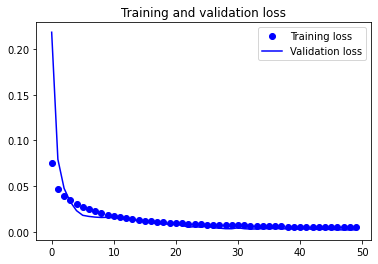

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

loss = np.array(autoencoder_train.history['loss'])
val_loss = np.array(autoencoder_train.history['val_loss'])
epochs = np.array(range(50))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
U_net.save_weights('U_net_arch.h5')

In [ ]:
from google.colab import files
files.download('/content/U_net_arch.h5') 

predict


In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred= U_net.predict(x = test_generator, 
                         batch_size=1,
                         verbose = 1,
                         steps = STEP_SIZE_TEST,
                         max_queue_size = 10
                         )

5/5 [==============================] - 44s 9s/step


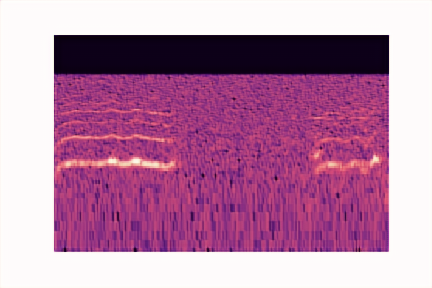

In [ ]:
from keras.preprocessing import image

recon_arr = pred[0]*255
pred_img = image.array_to_img(recon_arr)
pred_img.save('my.png')
display(pred_img)

Get the Encoded layer and flatten it for the features which will be used in the classification model


In [ ]:

encoded = Model(inputs=U_net.input, outputs=U_net.get_layer('block_5_conv2').output)
Y_test = encoded.predict(x = test_generator, 
                         batch_size=1,
                         verbose = 1,
                         steps = STEP_SIZE_TEST,
                         max_queue_size = None)

5/5 [==============================] - 1s 159ms/step


In [ ]:
print(Y_test.shape)

(155, 18, 27, 128)


In [ ]:
Y_train = encoded.predict(x = train_generator, 
                         batch_size=1,
                         verbose = 1,
                         steps = STEP_SIZE_TRAIN,
                         max_queue_size = None)

18/18 [==============================] - 14s 755ms/step


In [ ]:
print(Y_train.shape)

(486, 18, 27, 128)


In [ ]:
Y_valid = encoded.predict(x = valid_generator, 
                         batch_size=1,
                         verbose = 1,
                         steps = STEP_SIZE_VALID,
                         max_queue_size = None)

6/6 [==============================] - 1s 146ms/step


In [ ]:
"""
mean_encoded_test = np.mean(Y_test,axis = 3)
mean_encoded_train = np.mean(Y_train,axis = 3)
mean_encoded_valid = np.mean(Y_valid,axis = 3)

flatten_encoded_test = mean_encoded_test.reshape(mean_encoded_test.shape[0],-1)
flatten_encoded_train = mean_encoded_train.reshape(mean_encoded_train.shape[0],-1)
flatten_encoded_valid = mean_encoded_valid.reshape(mean_encoded_valid.shape[0],-1)
"""

'\nmean_encoded_test = np.mean(Y_test,axis = 3)\nmean_encoded_train = np.mean(Y_train,axis = 3)\nmean_encoded_valid = np.mean(Y_valid,axis = 3)\n\nflatten_encoded_test = mean_encoded_test.reshape(mean_encoded_test.shape[0],-1)\nflatten_encoded_train = mean_encoded_train.reshape(mean_encoded_train.shape[0],-1)\nflatten_encoded_valid = mean_encoded_valid.reshape(mean_encoded_valid.shape[0],-1)\n'

In [ ]:
flatten_encoded_test = Y_test.reshape(Y_test.shape[0],-1)
flatten_encoded_train = Y_train.reshape(Y_train.shape[0],-1)
flatten_encoded_valid = Y_valid.reshape(Y_valid.shape[0],-1)

In [ ]:
print(flatten_encoded_valid.shape)

(150, 62208)


In [ ]:
#np.savetxt("encoded_features.csv", flatten_encoded, delimiter=",")

Labels


In [ ]:
import os
def get_file_length(file_path):
  path, dirs, files = next(os.walk(file_path))
  count = len(files)
  #print(count)
  return count


In [ ]:
def get_labels(c1,c2,c3,c4,c5):
  labels = np.zeros((c1,1))
  labels = np.concatenate((labels,np.ones((c2,1))))
  labels = np.concatenate((labels,2*np.ones((c3,1))))
  labels = np.concatenate((labels,3*np.ones((c4,1))))
  labels = np.concatenate((labels,4*np.ones((c5,1))))
  #print(labels.shape)
  return labels
  

In [ ]:
# File Length 
belly_pain_count_test = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/test/belly_pain')
burping_count_test = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/test/burping')
discomfort_count_test = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/test/discomfort')
hungry_count_test = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/test/hungry')
tired_count_test = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/test/tired')
belly_pain_count_train = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/train/belly_pain')
burping_count_train = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/train/burping')
discomfort_count_train = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/train/discomfort')
hungry_count_train = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/train/hungry')
tired_count_train = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/train/tired')
belly_pain_count_valid = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/val/belly_pain')
burping_count_valid = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/val/burping')
discomfort_count_valid = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/val/discomfort')
hungry_count_valid = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/val/hungry')
tired_count_valid = get_file_length(r'/content/drive/My Drive/Baby Cry/donateacry-corpus-master/png/val/tired')

In [ ]:
labels_test = get_labels(belly_pain_count_test , burping_count_test , discomfort_count_test , hungry_count_test , tired_count_test)
labels_train = get_labels(belly_pain_count_train , burping_count_train , discomfort_count_train , hungry_count_train , tired_count_train)
labels_valid = get_labels(belly_pain_count_valid , burping_count_valid , discomfort_count_valid , hungry_count_valid , tired_count_valid)

Dimensionality reduction and representation using PCA/t-SNE 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# flatten the orignal 
flatten_orig_encoded_test = Y_test.reshape(Y_test.shape[0], -1)
flatten_orig_encoded_train = Y_train.reshape(Y_train.shape[0], -1)
flatten_orig_encoded_valid = Y_valid.reshape(Y_valid.shape[0], -1)
print(flatten_orig_encoded_test.shape)



import pandas as pd

#converting to a dataframe to plot easily

# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

feat_cols = [ 'feature'+str(i) for i in range(flatten_orig_encoded_test.shape[1]) ]
df_test = pd.DataFrame(flatten_orig_encoded_test,columns=feat_cols)
df_test['y'] = labels_test
df_test['label'] = df_test['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df_test.shape))

#------------------------------------------------------------------------
"""
feat_cols = [ 'feature'+str(i) for i in range(flatten_orig_encoded_valid.shape[1]) ]
df_valid = pd.DataFrame(flatten_orig_encoded_valid,columns=feat_cols)
df_valid['y'] = labels_valid[0:175]
df_valid['label'] = df_valid['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df_valid.shape))
"""
#-----------------------------------------------------------------
pca_test = PCA(n_components=10)
pca_result_test = pca_test.fit_transform(df_test[feat_cols].values)
df_test['pca-'+str(1)] = pca_result_test[:,0]
df_test['pca-'+str(2)] = pca_result_test[:,1] 
df_test['pca-'+str(3)] = pca_result_test[:,2]
df_test['pca-'+str(4)] = pca_result_test[:,3]
df_test['pca-'+str(5)] = pca_result_test[:,4] 
df_test['pca-'+str(6)] = pca_result_test[:,5]
print('Explained variation per principal component: {}'.format(pca_test.explained_variance_ratio_))
#-------------------------------------------------------------------


(155, 62208)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ValueError: ignored

In [ ]:

feat_cols = [ 'feature'+str(i) for i in range(flatten_orig_encoded_train.shape[1]) ]
df_train = pd.DataFrame(flatten_orig_encoded_train,columns=feat_cols)
df_train['y'] = labels_train[0:540]
df_train['label'] = df_train['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df_train.shape))

pca_train = PCA(n_components = 10)
pca_result_train = pca_train.fit_transform(df_train[feat_cols].values)
df_train['pca-'+str(1)] = pca_result_train[:,0]
df_train['pca-'+str(2)] = pca_result_train[:,1] 
df_train['pca-'+str(3)] = pca_result_train[:,2]
df_train['pca-'+str(4)] = pca_result_train[:,3]
df_train['pca-'+str(5)] = pca_result_train[:,4] 
df_train['pca-'+str(6)] = pca_result_train[:,5]
print('Explained variation per principal component: {}'.format(pca_train.explained_variance_ratio_))

Size of the dataframe: (540, 124418)
Explained variation per principal component: [0.57674974 0.17651898 0.05825965 0.03318185 0.01788197 0.0150546
 0.01227596 0.00844524 0.0065871  0.00618282]


Get numpy PCA results

In [ ]:
PCA1 = df_test['pca-'+str(1)].to_numpy()
PCA2 = df_test['pca-'+str(2)].to_numpy()
PCA3 = df_test['pca-'+str(3)].to_numpy()
PCA4 = df_test['pca-'+str(4)].to_numpy()
PCA5 = df_test['pca-'+str(5)].to_numpy()
PCA6 = df_test['pca-'+str(6)].to_numpy()

PCA1  =np.reshape(PCA1,(PCA1.shape[0],1))
PCA2  =np.reshape(PCA2,(PCA2.shape[0],1))
PCA3  =np.reshape(PCA3,(PCA3.shape[0],1))
PCA4  =np.reshape(PCA4,(PCA4.shape[0],1))
PCA5  =np.reshape(PCA5,(PCA5.shape[0],1))
PCA6  =np.reshape(PCA6,(PCA6.shape[0],1))

PCA_test_results = np.concatenate((PCA1,PCA2,PCA3,PCA4,PCA5,PCA6),axis = 1)
print(PCA_test_results.shape)

(186, 6)


In [ ]:
PCA1 = df_train['pca-'+str(1)].to_numpy()
PCA2 = df_train['pca-'+str(2)].to_numpy()
PCA3 = df_train['pca-'+str(3)].to_numpy()
PCA4 = df_train['pca-'+str(4)].to_numpy()
PCA5 = df_train['pca-'+str(5)].to_numpy()
PCA6 = df_train['pca-'+str(6)].to_numpy()

PCA1  =np.reshape(PCA1,(PCA1.shape[0],1))
PCA2  =np.reshape(PCA2,(PCA2.shape[0],1))
PCA3  =np.reshape(PCA3,(PCA3.shape[0],1))
PCA4  =np.reshape(PCA4,(PCA4.shape[0],1))
PCA5  =np.reshape(PCA5,(PCA5.shape[0],1))
PCA6  =np.reshape(PCA6,(PCA6.shape[0],1))

PCA_train_results = np.concatenate((PCA1,PCA2,PCA3,PCA4,PCA5,PCA6),axis = 1)
print(PCA_train_results.shape)

(540, 6)


# Differenct Classifiers



KNN


In [ ]:
"""
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors = 4, weights = 'distance') 
clf.fit(flatten_encoded_train,labels_train[0:540])
"""

"\nfrom sklearn import neighbors\n\nclf = neighbors.KNeighborsClassifier(n_neighbors = 4, weights = 'distance') \nclf.fit(flatten_encoded_train,labels_train[0:540])\n"

SVM


In [ ]:
from sklearn import svm

clf = svm.SVC(C= 5.0, kernel='rbf', gamma='scale',
                coef0=0.0, shrinking=True, probability=False,tol=0.001,
                cache_size=200, class_weight=None, verbose=False, max_iter=-1,
                decision_function_shape='ovr', break_ties=True, random_state=None)
clf.fit(flatten_encoded_train,labels_train[0:486])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5.0, break_ties=True, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Random Forest

In [ ]:
"""
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                             min_impurity_split=None, bootstrap=True, oob_score=False,
                             n_jobs=None, random_state=None, verbose=0, warm_start=False,
                             class_weight=None, ccp_alpha=0.0, max_samples=None)

clf.fit(flatten_encoded_train,labels_train[0:540])
"""

"\nfrom sklearn.ensemble import RandomForestClassifier\nclf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,\n                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,\n                             max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,\n                             min_impurity_split=None, bootstrap=True, oob_score=False,\n                             n_jobs=None, random_state=None, verbose=0, warm_start=False,\n                             class_weight=None, ccp_alpha=0.0, max_samples=None)\n\nclf.fit(flatten_encoded_train,labels_train[0:540])\n"

In [ ]:
#predicted_valid = clf.predict(flatten_encoded_valid)
predicted_test = clf.predict(flatten_encoded_test)

In [ ]:
predicted_test = predicted_test.reshape((len(predicted_test),1))
print(predicted_test.shape)

(155, 1)


In [ ]:
import sklearn
acc_test = sklearn.metrics.accuracy_score(predicted_test,labels_test[0:155])
print(acc_test)
#acc_valid = sklearn.metrics.accuracy_score(predicted_valid,labels_valid[0:170])
#print(acc_valid)


0.4967741935483871


In [ ]:
rndperm = np.random.permutation(df_test.shape[0])
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df_test.loc[rndperm,:],
    legend="full",
    alpha=1
)

In [ ]:
"""
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df_train.loc[rndperm,:],
    legend="full",
    alpha=1
)
"""

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_test.loc[rndperm,:]["pca-one"], 
    ys=df_test.loc[rndperm,:]["pca-two"], 
    zs=df_test.loc[rndperm,:]["pca-three"], 
    c=df_test.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

t-SNE

In [ ]:
N = 10000
df_subset = df_test.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=1
)

In [ ]:
print(df_subset.shape)

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=1,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=1,
    ax=ax2
)


In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))